# Курсовой проект

### Загрузка библиотек

In [477]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [417]:
df_train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
print('Data is loaded!')

Data is loaded!


### Описание данных

* **User_ID** - идентификационный номер покупателя
* **Product_ID** - идентификационный номер товара
* **Gender** - пол покупателя
* **Age** - возраст покупателя
* **Occupation** - род деятельности покупателя
* **City_Category** - город проживания
* **Stay_In_Current_City_Years** - как долго покупатель живет в этом городе
* **Marital_Status** - семейное положение покупателя
* **Product_Category_1** - категория товара 1
* **Product_Category_2** - категория товара 2
* **Product_Category_3** - категория товара 3
* **Purchase** - сумма покупок

In [418]:
print(f'Train: {df_train.shape[0]} строк и {df_train.shape[1]} признаков')

Train: 80000 строк и 12 признаков


In [419]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### Определим признаки

In [420]:
feature_names = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

target_name = 'Purchase'

In [421]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Изучение признаков

**Целевая переменная -  target**

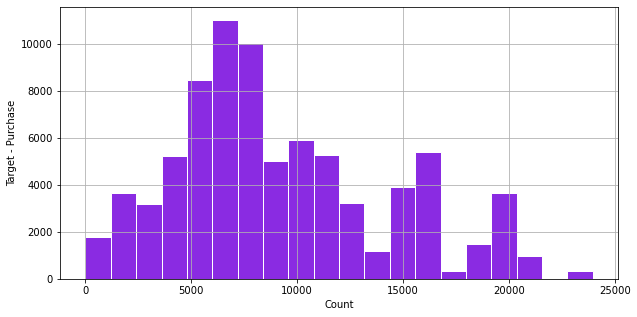

In [504]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_train['Purchase'], bins = 20, color = 'blueviolet', ec = 'white')
plt.xlabel('Count')
plt.ylabel('Target - Purchase')
fig.set_size_inches(10, 5)
ax.grid()

Распределение целевой переменной нельзя назвать нормальным

**Большинство признаков в этом датасете являются категориальными. Изучим их подробнее**

#### Gender

In [422]:
df_train['Gender'].value_counts()

M    60068
F    19932
Name: Gender, dtype: int64

Количество покупателей мужчин почти в 3 раза превосходит количество покупателей женщин
Если при изучении значимости признаков окажется, что пол оказывает большое влияние на целевую переменную, необходимо с осторожностью обрабатывать спрос покупателей-женщин, т.к. их доля существенно меньше и ошибки будут иметь бОльший вес

#### Age

В данном признаке целесообразно определить минимум и максимум для понимания диапазона взраста покупателей

In [423]:
df_train['Age'].min()

'0-17'

In [424]:
df_train['Age'].max()

'55+'

In [425]:
# Определим количество возрастных групп в наблюдениях:
df_train['Age'].nunique()

7

In [426]:
# Посмотрим заброс покупателей по возрастным группам:
df_train['Age'].value_counts()

26-35    32067
36-45    16025
18-25    14286
46-50     6777
51-55     5555
55+       3110
0-17      2180
Name: Age, dtype: int64

Наибольшее количество покупок приходится на возрастную группу 26-35 лет. Можно предположить, что опираясь именно на этот возраст, можно выявить основные тендеции
Самые низкие показатели у покупателей до 18 лет и у покупателей старше 55.

Можно допустить, что небольшая доля покупок у покупалетей до 18 лет связана с ограничениями на площадке продажи

In [427]:
#Изучим соотношение мужчин и жещин в каждой возрастной группе
df_train.groupby(['Age', 'Gender'])['User_ID'].count()

Age    Gender
0-17   F           779
       M          1401
18-25  F          3634
       M         10652
26-35  F          7526
       M         24541
36-45  F          3943
       M         12082
46-50  F          1917
       M          4860
51-55  F          1393
       M          4162
55+    F           740
       M          2370
Name: User_ID, dtype: int64

Более всего бросается в глаза разница в группе 26-35 лет и старше 55 лет

#### Occupation

In [428]:
df_train['Occupation'].unique()

array([ 6,  7,  3,  0,  4,  1, 20, 18, 14, 17, 16, 10, 12,  2, 15, 19,  9,
       13,  5, 11,  8])

In [429]:
df_train['Occupation'].nunique()

21

In [430]:
df_train['Occupation'].value_counts()

4     10443
0     10188
7      8474
1      6921
17     5815
20     4887
12     4559
14     4030
2      3849
16     3724
6      2902
3      2598
10     1876
5      1824
15     1712
11     1706
19     1258
13     1132
18     1011
9       857
8       234
Name: Occupation, dtype: int64

Видимо от 0 - 20  - это коды сфер деятельности покупателей
Наиболее распространенные виды деятельностис кодами 4 и 0, наименее - 9 и 8
В остальном распределение примерно равномерное

#### City_Category

In [431]:
df_train['City_Category'].value_counts()

B    33767
C    24778
A    21455
Name: City_Category, dtype: int64

Изучаются покупатели из трех городов. Распределение можно назвать равномерным

#### Stay_In_Current_City_Years 

In [432]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     28287
2     14830
3     13853
4+    12250
0     10780
Name: Stay_In_Current_City_Years, dtype: int64

Большинство изучаемых покупателей проживают в стране относительно недавно - 1 год.
Наименьшая часть - новоприбывшие и те, кто проживают длительно
Можно сделать вывод, что покупки в основном совершают те, кто переехал недавно

#### Marital_Status  

In [433]:
df_train['Marital_Status'].value_counts()

0    47249
1    32751
Name: Marital_Status, dtype: int64

Сильного разброса между людьми,  находящимися в браке и не в браке нет. 

In [434]:
df_train.groupby(['Age', 'Marital_Status'])['User_ID'].count()

Age    Marital_Status
0-17   0                  2180
18-25  0                 11234
       1                  3052
26-35  0                 19572
       1                 12495
36-45  0                  9695
       1                  6330
46-50  0                  1871
       1                  4906
51-55  0                  1581
       1                  3974
55+    0                  1116
       1                  1994
Name: User_ID, dtype: int64

В группах до 45 лет большинство покупок делают люди, не находящиеся в браке и с каждой группой разница сокращается. 
После 46 лет доля покупателей в браке существенно превышает долю неженатых. Вероятно, в данном регионе достаточно поздний возраст вступления в брак

До 18 лет вступивших в брак нет - выбросов в данном случае не обнаружено

#### Признаки Product_Category_1, 2 и 3 

In [435]:
df_train['Product_Category_1'].unique()

array([ 8,  5,  1,  2,  6, 11,  3,  4,  7, 18, 15, 20, 10, 16, 13, 12, 19,
       14,  9, 17])

In [436]:
df_train['Product_Category_1'].nunique()

20

In [437]:
df_train['Product_Category_2'].unique()

array([14.,  6., 15., 12., nan,  5.,  8., 17., 13., 16., 10., 11.,  2.,
        4.,  9., 18.,  3.,  7.])

In [438]:
df_train['Product_Category_2'].nunique()

17

In [439]:
df_train['Product_Category_3'].unique()

array([nan, 16., 15., 17., 13.,  8., 12.,  5., 18.,  9., 14.,  6.,  3.,
       11., 10.,  4.])

In [440]:
df_train['Product_Category_3'].nunique()

15

Наибольшее количество позиций в Product_Category_1.
В Product_Category 2 и 3 одно из значений - nan.
Дополнительно поработаем с ним при обработке пропусков

### Обработка пропусков

In [441]:
df_train.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            25108
Product_Category_3            55669
Purchase                          0
dtype: int64

Изучим дополнительно признаки Product_Category_2 & 3, содержащие большое количество пропусков

#### Product_Category_2

In [442]:
df_train['Product_Category_2'].value_counts()

8.0     9351
14.0    8050
2.0     7062
16.0    6355
15.0    5487
5.0     3880
4.0     3823
6.0     2427
11.0    2077
17.0    1937
13.0    1535
12.0     799
9.0      784
10.0     460
18.0     400
3.0      378
7.0       87
Name: Product_Category_2, dtype: int64

In [443]:
df_train['Product_Category_2'].isnull().sum()

25108

В связи с большим количеством пропусков, наиболее удачным вариантом было бы их заполнить с помощью модели на основе признаков с хорошей корреляцией без пропущенных значений
Предположительно, этот вариант заполнения будет наиболее удачным в данном случае, нежели заполнять медианой или средним

#### Product_Category_3

In [444]:
df_train['Product_Category_3'].value_counts()

16.0    4724
15.0    4084
14.0    2697
17.0    2425
5.0     2386
8.0     1805
9.0     1755
12.0    1403
13.0     794
6.0      725
18.0     689
11.0     257
4.0      253
10.0     241
3.0       93
Name: Product_Category_3, dtype: int64

In [445]:
df_train['Product_Category_3'].isnull().sum()

55669

Позднее при изучении корреляции признаков, будет яснее. Пропущенных значений более 50%. Если его корреляция с целевой переменной низкая, можно рассмотреть вариант - пренебречь этим признаком
Возможно, это даст лучший результат нежели заполнять такое количество значений, что необязательно может оказаться точным

### Обработка категориальных признаков  - Генерация новых признаков

In [446]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Необходимо перевести в количественные типы признаки Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years

#### Gender
Переведем в дамми

In [447]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Gender'])], axis = 1)

In [448]:
df_train.drop('Gender', axis = 1)
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'F', 'M'],
      dtype='object')

In [449]:
df_train['F'].dtype

dtype('uint8')

In [450]:
df_train = df_train.drop('Gender', axis = 1)

#### Age
Переведем возрастные группы в категории в порядке увеличения возраста

In [451]:
df_train['Age'].unique()

array(['26-35', '18-25', '36-45', '51-55', '0-17', '46-50', '55+'],
      dtype=object)

In [452]:
def age_to_cat(df):
    
    df['age_cat'] = 0
    df.loc[df['Age'] == '0-17', 'age_cat'] = 1
    df.loc[df['Age'] == '18-25', 'age_cat'] = 2
    df.loc[df['Age'] == '26-35', 'age_cat'] = 3
    df.loc[df['Age'] == '36-45', 'age_cat'] = 4
    df.loc[df['Age'] == '46-50', 'age_cat'] = 5
    df.loc[df['Age'] == '50-55', 'age_cat'] = 6
    df.loc[df['Age'] == '55+', 'age_cat'] = 7
    
    return df

In [453]:
df_train = age_to_cat(df_train)

In [454]:
df_train = df_train.drop('Age', axis = 1)
df_train.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,age_cat
0,1004085,P00075742,6,A,1,0,8,14.0,NaN,7803,1,0,3
1,1005491,P00234842,7,A,1,0,5,6.0,16.0,6903,0,1,2
2,1003499,P00220142,3,A,2,0,1,15.0,NaN,15773,0,1,3
3,1000097,P00211242,3,C,3,0,8,12.0,NaN,8116,1,0,4
4,1005802,P00327142,0,A,4+,0,8,15.0,NaN,6144,1,0,3


#### City_Category

In [455]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

Переведем в дамми

In [456]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['City_Category'])], axis = 1)

In [457]:
df_train.rename(columns = {'A': 'City_Category_A', 'B': 'City_Category_B', 'C': 'City_Category_C'}, inplace = True)
df_train = df_train.drop('City_Category', axis = 1)
df_train.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,age_cat,City_Category_A,City_Category_B,City_Category_C
0,1004085,P00075742,6,1,0,8,14.0,NaN,7803,1,0,3,1,0,0
1,1005491,P00234842,7,1,0,5,6.0,16.0,6903,0,1,2,1,0,0
2,1003499,P00220142,3,2,0,1,15.0,NaN,15773,0,1,3,1,0,0
3,1000097,P00211242,3,3,0,8,12.0,NaN,8116,1,0,4,0,0,1
4,1005802,P00327142,0,4+,0,8,15.0,NaN,6144,1,0,3,1,0,0


#### Stay_In_Current_City_Years

Переведем в категории по увеличению времени проживания в городе

In [458]:
df_train['Stay_In_Current_City_Years'].unique()

array(['1', '2', '3', '4+', '0'], dtype=object)

In [459]:
def stay_in_city_to_cat(df):
    
    df['stay_in_city_cat'] = 0
    df.loc[df['Stay_In_Current_City_Years'] == '0', 'stay_in_city_cat'] = 1
    df.loc[df['Stay_In_Current_City_Years'] == '1', 'stay_in_city_cat'] = 2
    df.loc[df['Stay_In_Current_City_Years'] == '2', 'stay_in_city_cat'] = 3
    df.loc[df['Stay_In_Current_City_Years'] == '3', 'stay_in_city_cat'] = 4
    df.loc[df['Stay_In_Current_City_Years'] == '4+', 'stay_in_city_cat'] = 5
    
    return df

In [460]:
df_train = stay_in_city_to_cat(df_train)

In [461]:
df_train = df_train.drop('Stay_In_Current_City_Years', axis = 1)
df_train.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,age_cat,City_Category_A,City_Category_B,City_Category_C,stay_in_city_cat
0,1004085,P00075742,6,0,8,14.0,NaN,7803,1,0,3,1,0,0,2
1,1005491,P00234842,7,0,5,6.0,16.0,6903,0,1,2,1,0,0,2
2,1003499,P00220142,3,0,1,15.0,NaN,15773,0,1,3,1,0,0,3
3,1000097,P00211242,3,0,8,12.0,NaN,8116,1,0,4,0,0,1,4
4,1005802,P00327142,0,0,8,15.0,NaN,6144,1,0,3,1,0,0,5


In [462]:
df_train.dtypes

User_ID                 int64
Product_ID             object
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
F                       uint8
M                       uint8
age_cat                 int64
City_Category_A         uint8
City_Category_B         uint8
City_Category_C         uint8
stay_in_city_cat        int64
dtype: object

#### Product_ID

In [463]:
df_train['Product_ID'] = df_train['Product_ID'].map(lambda x: str(x)[1:]) 
df_train.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,age_cat,City_Category_A,City_Category_B,City_Category_C,stay_in_city_cat
0,1004085,00075742,6,0,8,14.0,NaN,7803,1,0,3,1,0,0,2
1,1005491,00234842,7,0,5,6.0,16.0,6903,0,1,2,1,0,0,2
2,1003499,00220142,3,0,1,15.0,NaN,15773,0,1,3,1,0,0,3
3,1000097,00211242,3,0,8,12.0,NaN,8116,1,0,4,0,0,1,4
4,1005802,00327142,0,0,8,15.0,NaN,6144,1,0,3,1,0,0,5


In [467]:
df_train['Product_ID'] = df_train['Product_ID'].astype(int)
df_train['Product_ID'].dtype

dtype('int64')

**Убедимся, что у нас не осталось строковых (нечисловых) типов данных**

In [469]:
df_train.dtypes

User_ID                 int64
Product_ID              int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
F                       uint8
M                       uint8
age_cat                 int64
City_Category_A         uint8
City_Category_B         uint8
City_Category_C         uint8
stay_in_city_cat        int64
dtype: object

###  Переопределение признаков

In [487]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'F', 'M', 'age_cat', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'stay_in_city_cat'],
      dtype='object')

In [486]:
#не будем учитывать User_ID
feature_names = ['Product_ID', 'Occupation', 'Marital_Status',
        'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
        'F', 'M', 'age_cat', 'City_Category_A', 'City_Category_B',
        'City_Category_C', 'stay_in_city_cat']

target_name = 'Purchase'

### Построение матрицы корреляций

<AxesSubplot:>

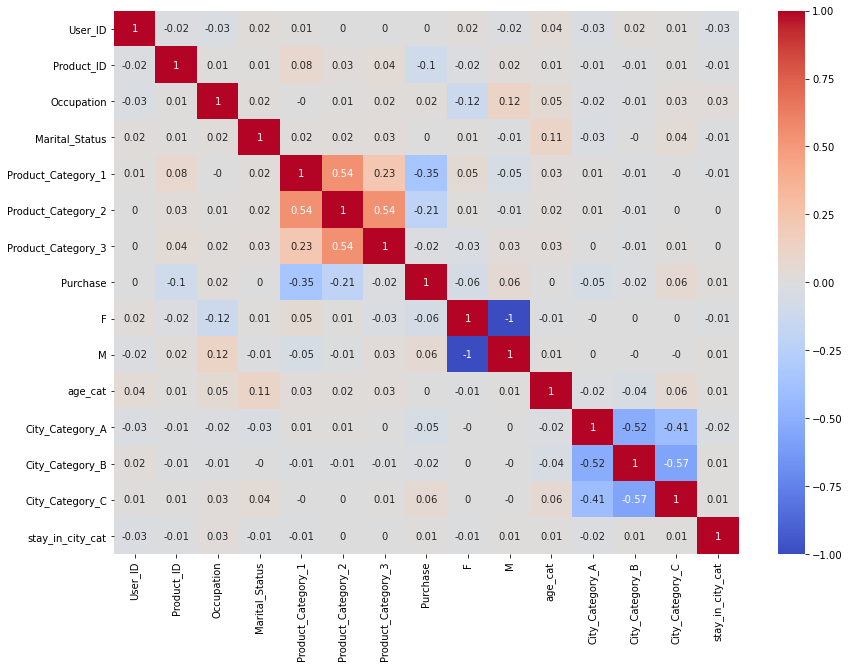

In [490]:
corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

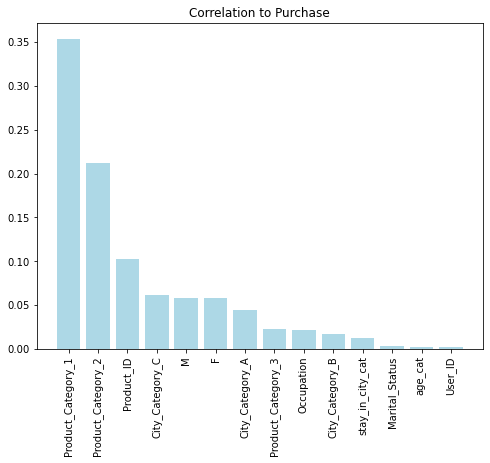

In [506]:
corr_matrix = df_train.corrwith(df_train['Purchase'])
corr_matrix = df_train.loc[:, df_train.columns != 'Purchase'].corrwith(df_train['Purchase']).abs().sort_values(ascending=False)
plt.figure(figsize = (8, 6))
plt.bar(corr_matrix.index, corr_matrix.values, color = 'lightblue')
plt.title('Correlation to Purchase')
plt.xticks(rotation='vertical')
plt.show()